In [36]:
import numpy as np
import nltk
from nltk.corpus import movie_reviews
import random
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

In [37]:
# Download the NLTK movie_reviews dataset if not already downloaded
nltk.download('movie_reviews')
nltk.download('punkt')

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [38]:
# Load the movie_reviews dataset
documents = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]

In [39]:
# Shuffle the documents for randomness
random.shuffle(documents)

In [40]:
# Extract text and labels from the dataset
texts = [" ".join(document) for document, category in documents]
labels = [1 if category == 'pos' else 0 for _, category in documents]  # Convert 'pos' to 1 and 'neg' to 0

In [41]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

In [42]:
# Vectorize the text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=10000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [43]:
# Create and train a Support Vector Machine (SVM) classifier
svm_classifier = SVC(C=1.0, kernel='linear')
svm_classifier.fit(X_train_tfidf, y_train)


SVC(kernel='linear')

In [44]:
# Make predictions on the test set
predictions = svm_classifier.predict(X_test_tfidf)

In [45]:
# Calculate and print accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)


Accuracy: 0.86


In [46]:
# Create a confusion matrix
confusion = confusion_matrix(y_test, predictions)

In [47]:
# Plot the confusion matrix
def plot_confusion_matrix(cm, labels):
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.get_cmap('Blues'))
    plt.title('Confusion Matrix')
    plt.colorbar()

    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)

    for i in range(len(labels)):
        for j in range(len(labels)):
            plt.text(j, i, str(cm[i][j]), horizontalalignment='center', color='white' if cm[i][j] > cm.max() / 2 else 'black')

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

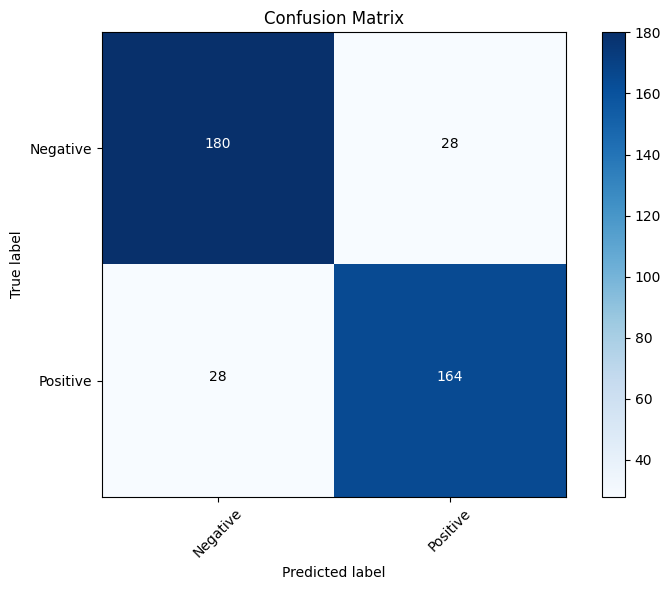

In [48]:
plot_confusion_matrix(confusion, labels=["Negative", "Positive"])
plt.show()

In [51]:
# Take user input and make predictions
user_input = input("Enter a sentence for sentiment analysis: ")
user_input_tfidf = tfidf_vectorizer.transform([user_input])
user_prediction = svm_classifier.predict(user_input_tfidf)
user_sentiment = "Positive" if user_prediction == 1 else "Negative"
print(f"Predicted sentiment: {user_sentiment}")

Enter a sentence for sentiment analysis: that party was such a hit
Predicted sentiment: Negative
